# Introduction to Dimensionality Reduction

#### Bryan Scott, CIERA/Northwestern
version 0.1, August 2023

Presented at LSSTC Data Science Fellowship Program Session 19: Machine Learning

<img src="images/three_body.png" alt="drawing" width="400"/>

### Learning Outcomes 

At the end of this lecture & tutorial, you should be able to 

1. Relate dimensionality reduction in the landscape of other learning techniques
2. Solve problems with dimensionality reduction (the "why" of dimensionality reduction)
3. Implement PCA on SDSS images and use t-SNE to produce a lower dimension representation of COSMOS photometry. 

### Further Reading

- $\textit{Introduction to Statistical Learning}$, by James, Witten, Hastie & Tibshirani
- $\textit{Mapping the Galaxy-Color Redshift Relation: Optimal Photometric Redshift Calibration Strategies for Cosmology Surveys}$, Masters, et al., https://arxiv.org/pdf/1704.06665.pdf
- $\textit{Visualizing Data using t-SNE}$, van der Maaten & Hinton https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

## Perspective I: Dimensionality Reduction as Learning

One way of thinking about the learning problem is to infer the probability distribution over some features:

$$
Pr(X)
$$

where X consists of d $\textit{features}$ over N observations - $\{\vec{x}_1, \vec{x}_2, ..., \vec{x}_N \}$. Here the subscript indicates the observation, with $\vec{x}$ a vector in $\mathbb{R}^d$.

This is a problem of characterizing a probability distribution in a potentially very high number of dimensions. We will also study the supervised learning problem this week, which is generally simpler because it typically involves making a point estimate $\mu(x)$ of y for some set of data labelled by y. In the unsupervised case, we are trying to fully characterize the distribution Pr(X).

In this interpretation, the task of dimensionality reduction is to find a lower dimensional, or $\textit{compressed}$, representation of Pr(X) that maintains the (some of the) structure of the full Pr(X) in the higher dimension space. 

## Perspective II: Dimensionality Reduction as Visualization



In [1]:
%matplotlib nbagg

In [2]:
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt


X = []
Y = []
Z = []


def update(t):
    ax.cla()

    x = np.cos(t/10)
    y = np.sin(t/10)
    z = t/10

    X.append(x)
    Y.append(y)
    Z.append(z)

    ax.scatter(x, y, z, s = 100, marker = 'o')
    ax.plot(X, Y, Z)

    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-1, 10)

<IPython.core.display.Javascript object>


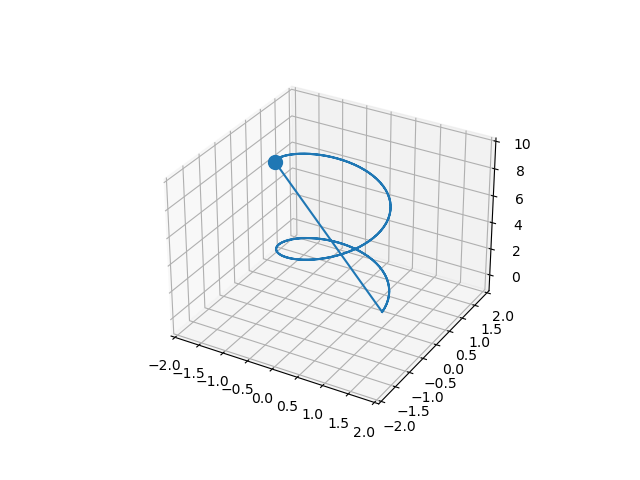

In [12]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(projection='3d')

ani = FuncAnimation(fig = fig, func = update, frames = 100, interval = 100, repeat = False)

plt.show()

## Why do we need (or want) to do this?

($\textit{Discuss with your neighbor.}$)

There are a few reasons you might (want to) do this:

1. High dimension data is computationally challenging. 
2. Many algorithms have poor scaling behavior in higher dimensions - generalize poorly when applied to high dimensional data. 
3. To enable interpretation through visualization. I can see relationships in 2D, 3D, or 4D, but what about 5D, 10D or 20D?
4. Many datasets are sparse in high dimensions or some dimensions may 'matter' more than others (more on this in a minute).

The first two reasons lead to a third interpretation of dimensionality reduction as a sort of $\textit{feature selection}$ or $\textit{feature engineering}$ problem.

In other words. Worry about the data. 

And worry about your features. 

Choosing the right features can matter a lot for simplifying the learning task and making it tractable.


## Why does this work (at all)?

The key intuitive insight that makes dimensionality reduction possible is the idea of $\textit{sparsity}$. Basically as data becomes increasingly high dimensional, the data samples smaller and smaller regions of the high dimensional space it lives in. 

## Dimensionality Reduction Techniques

Because there is no notion of 'ground truth' in the unsupervised learning context - we only have a sampling from from some distribution Pr(X) - it is hard to quantify the success or failure of a technique. This has led to a large proliferation of dimensionality reduction schemes.

I think of this as a feature and not a bug. We have lots of options for solving the dimensionality reduction problem and some should work better than others depending on the goals we have in characterizing the higher dimensional dataset. We also should have different visualizations with which to compare.

## Techniques we will cover today:

1. Principal Component Analysis 
2. t-distributed Stochastic Neighbor Embedding (t-SNE)
3. Self-Organizing Maps

## First Technique: Principal Component Analysis (PCA) 

The principal components of a set of data $\{\vec{x}_1, \vec{x}_2, ..., \vec{x}_N \}$ in $\mathbb{R}^p$ are the sequence of best linear approximations of rank $q \le p$. 

By linear approximation, we mean the following:

$$
f(\lambda) = \mu + V_q \lambda
$$

where $\lambda$ is a length q vector of parameters and $V_q$ is a $p \times q$ matrix with q orthogonal unit vectors as columns. $\mu$ is a location in $\mathbb{R}^p$.

It turns out the $\lambda$ can be written in terms of V_q. This allows us to define the notion of "best" as an optimization of the $V_q$. 

$$
min_{V_q} \Sigma_{i=1}^N || (x_i - \bar{x}) - V_q V_q^T (x_i - \bar{x}) ||^2
$$

The notation $H_q = V_q V_q^T$ is sometimes used. $H_q$ is a projection of the data onto a basis spanned by the columns of this matrix $H_q$. 

The proceeding optimization problem can be solved to decompose $X = (x_i - \bar{x})$ in terms of the $V_q$ matrices. A formal proof can be found in many linear algebra and ML texts (e.g. $\textit{Introduction to Statistical Learning}$). 

The result is that if we take the data and stack it into the rows of an $N \times p$ matrix, called X, then the $\textit{singular value decomposition}$ of X: 

$$
X = U D V^T
$$

gives the principal components. U is a $N \times p$ matrix that spans the column space. $V^T$ is a $p \times p$ matrix that spans the row space. D is a important diagonal object whose values are called the singular values. They are related to the variance of the data. In fact, the covariance of X is given by

$$
Cov(X) = V D^2 V^T
$$

and 

$$
Var(X v_i) = d_i^2/N
$$

Where the $d_i$ are the diagonal entries of D and $v_i$ is the first principal component (column of V). We'll come back to this in a second. 

We started this process with the goal of finding a matrix that projects some high dimension data into small number of dimensions. We found this matrix in terms of the singular value decomposition of the data, X. This gives the first interpretation of PCA as primarily about dimensionality reduction.

What we noticed on the last step is that the PCA procedure also organizes the principal components by the variance of the data. In fact, PCA picks out the "principal components" as exactly those vectors that maximize the variance in the data. This makes it very useful for constructing models of the data as weighted sums of these special vectors. 

We will explore this more with SDSS images in the tutorial.

## Second Technique: t-distributed Stochastic Neighbor Embedding (t-SNE)

### Stochastic Neighbor Embedding

$\textit{This section is based on the remarkably readable original t-SNE paper.}$

The goal of dimensionality reduction is often for visualizing data so that we can interpret structures or patterns. We saw this in the PCA example where we can read off the structure of the data by visualizing its variance maximizing components.

The key difference between Stochastic Neighbor Embedding and PCA is that PCA focuses only on keeping dissimilar points in the high dimensional space far apart without also ensuring that similar points are well represented in the lower dimensional space. This makes interpretation hard - we want to know if points are the same as much as we want to know if they're different! 

Wouldn't it be nice if the dimensionality reduction technique could come with some additional structure or machinary for interpreting the data?

One technique that aims at this is called Stochastic Neighbor Embedding. Here we take a datset with high dimensional components $\mathscr{X} = \{x_1, x_2, ..., x_n\}$ and convert it to some two dimensional data $\mathscr{Y} = \{y_1, y_2, ..., y_n\}$. We call $\mathscr{Y}$ a map and its components - map points. 

<img src="images/MNIST.png" alt="drawing" width="500"/> <img src="images/tSNE.png" alt="drawing" width="500"/>

SNE's key insight is to treat distances in the lower and higher dimensional spaces probabilistically. What that means is that rather than, as we'll see shortly, looking for a mapping that minimizes distances, we'll instead compare the distributions of data points. The most common way of doing this - and shared between variants of SNE techniques - is to consider the distributions of the similarity of points in the original high dimensional dataset $\mathscr{X}$ to be given by $p(j|i)$ and the distibution of similiarity of points in the lower dimensional map $\mathscr{Y}$ as $q(j|i)$. 

These are conditional probabilities for the jth point given a fixed ith. 

$$
KL_{ij} = \Sigma_i \Sigma_j p(j|i) log \frac{p(j|i)}{q(j|i)}
$$

which is called the Kullback-Leibler divergence. This is the "most natural" distance between two probability distributions. We will return to the KL divergence in future sessions.

The two conditional probabilities $p(j|i)$, $q(j|i)$ represent the similarity of nearby datapoints to one another. This is typically a gaussian in both the higher and lower dimensional space, but could be any function (we'll come back to this in a second!), in the Gaussian case, we have:

$$
p_{j|i} = \frac{e^\frac{-|| x_i - x_j ||^2}{2 \sigma^2}}{\Sigma_ke^\frac{-|| x_i - x_k ||^2}{2 \sigma^2}}
$$

In any case, this means that the parameters of the distributions used to represent how close two particles are has at least one free parameter - the variance $\sigma$ - and will also make use of the distances $x_i - x_j$ and $y_i - y_j$ in the dataset and in the map. 

Some brief technical comments: 

- different techniques exist for picking the variance of these gaussians. This is controlled in sklearn tSNE by the $\textit{perplexity}$ parameter.

- Training proceeds by explicitly calculating derivatives of the KL divergence as the map is varied. 

### Putting the t in tSNE

t-SNE proceeds in roughly the same way as all other SNE based techniques. The main difference is that rather than using a Gaussian assumption for the similarities in the map (lower dimensional representation) it instead uses a Student's t-distribution. 

In [6]:
import numpy as np
from scipy.stats import t, norm
import matplotlib.pyplot as plt

df = 2.74

<IPython.core.display.Javascript object>


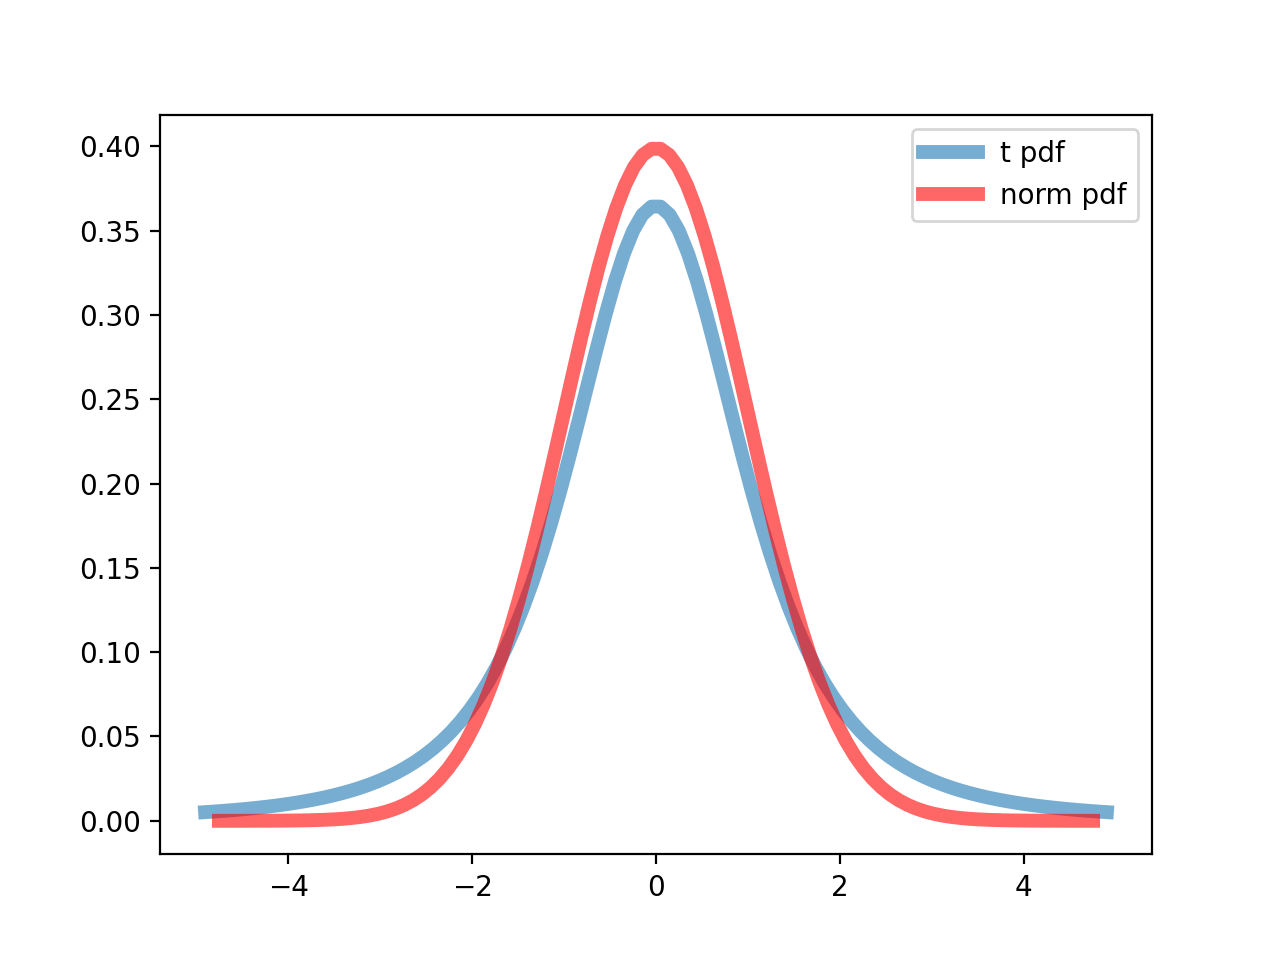

In [10]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df), lw=5, alpha=0.6, label='t pdf')

x2 = np.linspace(norm.ppf(0.000001), norm.ppf(0.999999), 100)
ax.plot(x2, norm.pdf(x2),'r-', lw=5, alpha=0.6, label='norm pdf')

plt.legend()
plt.show()

What is the difference between the Student's t-distribution and the Gaussian, why does it matter here? ($\textit{Discuss with your neighbor.}$)

<IPython.core.display.Javascript object>


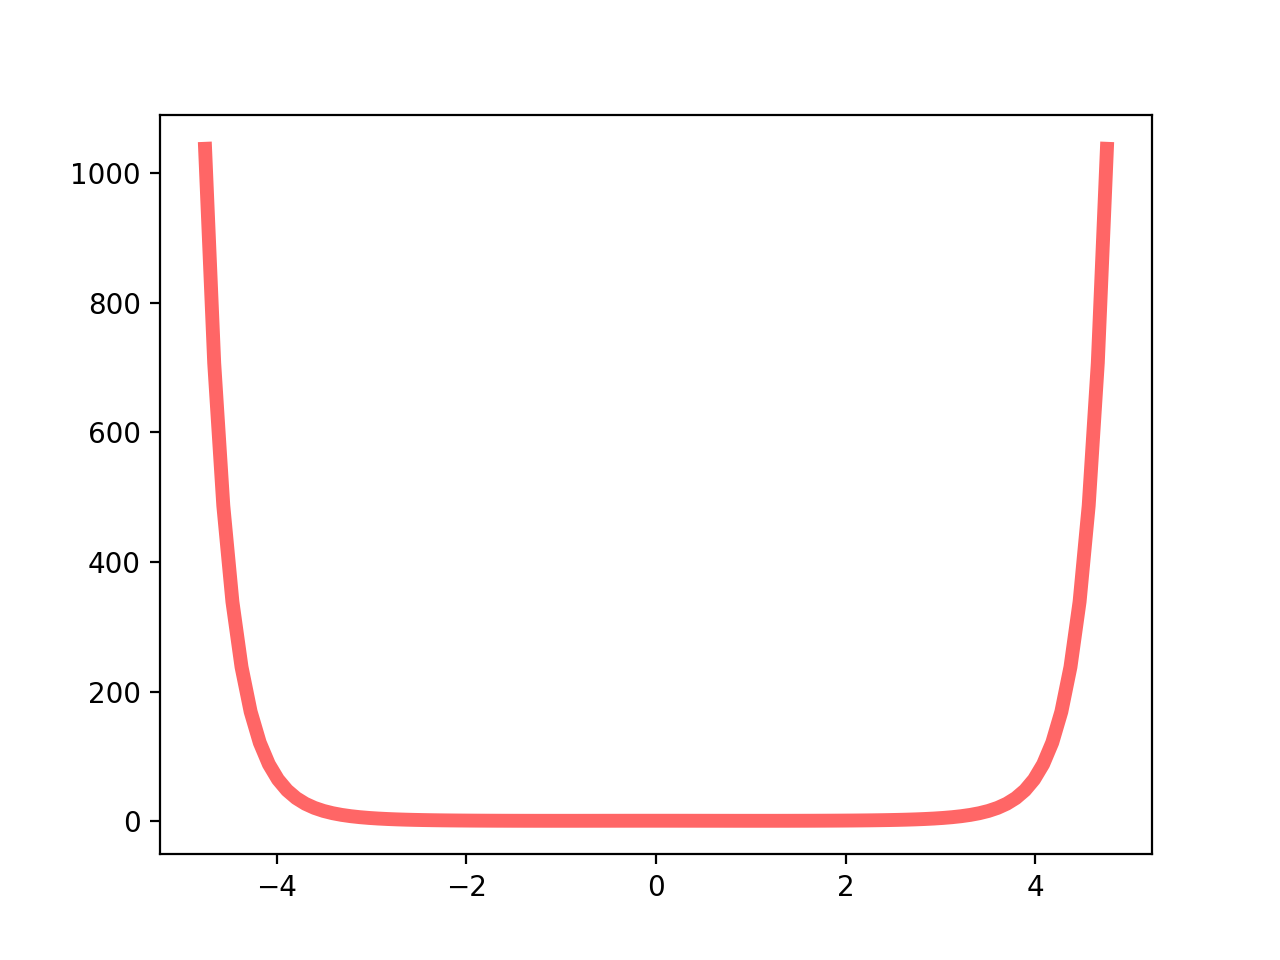

In [11]:
fig, ax = plt.subplots(1, 1)

ax.plot(x2, t.pdf(x, df)/norm.pdf(x2),'r-', lw=5, alpha=0.6, label='norm pdf')

Using the t-distribution allows you to "trade" extra probability in the 'fat tail' of the lower dimensional space for the larger distances in the higher dimensional space that would normally be assigned zero similarity at the tails. By better mapping large distances in high-d to higher probabilities in lower-d spaces, t-SNE solves the 'crowding problem' where large distances are incorrectly treated in other SNE techniques. 

## Third Technique: Self-Organizing Maps (SOM) 

A self-organizing map is a projection of data in some high dimensional space to a 2D plane, where the mapping seeks to preserve local relationships. 

Unlike the stochastic neighbor embedding techniques (like tSNE), which have an explicit notion of 'similarity', a SOM is an example of 'prototype learning'. In this kind of learning, we start with a grid of examples and adjust all of the examples until they (in some sense) best represent the data. The prototypes get many names in the SOM literature - $\textit{neurons}$ and $\textit{best matching unit}$ are common. I will use the term $\textit{prototype point}$. 

Let's look at an example of a self-organizing map before getting into the mathematical details.

arxiv: 1509.03318

<img src="images/SOM_masters.png" alt="drawing" width="900"/> 

Define a self organizing map as a 2D grid of K prototype points $m_j \in \mathbb{R}^p$ parameterized by an ordered pair $\textit{l}_j \in Q_1 \times Q_2$ s.t. $\{1, 2 ..., q_l\} = Q_1, Q_2$ and $K = q_1 \times q_2$. The $m_j$ are (often but not always) initialized in a 2D principle component plane. The ordered pair can be thought of as labelling the location of the prototype points. 

After initialization, compute all of the Euclidean distances in the high dimensional $\mathbb{R}^p$ space and find the closest prototype point. Then for all the neighbor prototype points $m_k$ (defined by some threshold), move them closer to the data via:

$$
m_k \leftarrow m_k + \alpha(x_j - m_k)
$$

The 'big idea' of the SOM procedure is that this bends the 2D plane so that the prototype points approximate the data as well as possible. You can think of this as combining k-means clustering (from Adam's lecture) with the intuition from principal component analysis. This is a type of $\textit{competitive learning}$. These are interesting because the topology of the high dimensional space is maintained in the lower dimensional representation of the SOM.

Pseudo-code for implementing a SOM is given as a challenge problem in the tutorial. 

## Important Caveats about Each Technique

Principal Component Analysis: 

- Be careful about interpreting the principal components. They are not always physically meaningful.
- PCA decomposes data into variance ordered components, but it doesn't have any way of decomposing the variance. In other words - PCA has no notion of noise.
- As an extreme example, PCA is unable to handle missing data. This is a problem for spectroscopic or time-series data that may not cover the same range. 
- Extensions of PCA attempt to address these issues ("Expectation Maximization PCA").

tSNE: 
- tSNE relies on matching probability distributions. This makes it (also) susceptible to the presence of noisy dimensions. 
- (lack of) structure in tSNE plots is hard to interpret. Categorical data that is well separated will often be easily separated by other techniques, but data that isn't seperated in the tSNE plane isn't necessarily difficult to classify with other techniques. 

SOM: 
- the choice of SOM updating scheme impacts the map. There is no 'ground truth' or 'correct' SOM. 
- cells in the SOM can often be supported by a single or very few data points. 
- SOMs preserve local structure but may not preserve the global structure of the map.

## What's next? The tutorial notebook. Here's an overview: 

The tutorial notebook starts by asking you to implement Principal Component Analysis and apply it to a set of images from SDSS. After using your own implementation, you'll work through the PCA implementation in sklearn and compare the two. 

Once you've done that, you'll get a chance to work with tSNE. We'll transition to the problem of photometric redshift estimation. I've given you 28 band photometry from Cosmos2020 and binned (categorical) redshift data. Generate a tSNE map of the 28 band photometry. 

Finally, we'll continue with the theme of photo-zs by interpreting a SOM produced using the RAIL package within the LSST Dark Energy Science Collaboration. The exercise will walk you through interpreting a self-organizing map and point out several important caveats to their use. 